In [43]:
# Importation et utilisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style Seaborn
sns.set_style('whitegrid')

In [44]:
df = pd.read_csv('Annual_Surface_Temperature_Change.csv', encoding='ISO-8859-1')

In [45]:
# Utiliser melt pour transformer les colonnes d'années en une seule colonne 'year'
df_melted = df.melt(
    id_vars=['Country', 'ISO3', 'Indicator', 'Unit', 'CTS_Code', 'CTS_Name', 'Industry', 'Gas_Type'],
    var_name='Year',
    value_name='Value'
)

# Extraire l'année de la colonne 'Year' en supprimant le préfixe 'F'
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)

In [5]:
df_region = pd.read_csv('continents-according-to-our-world-in-data.csv', encoding='ISO-8859-1')

# renommer la colonne 'Entity' en 'Country' pour la fusion
df_region.rename(columns={'Entity': 'Country'}, inplace=True)

# Fusionner les deux DataFrames sur la colonne 'Country'
df_merged = pd.merge(df_melted, df_region, on='Country', how='left')

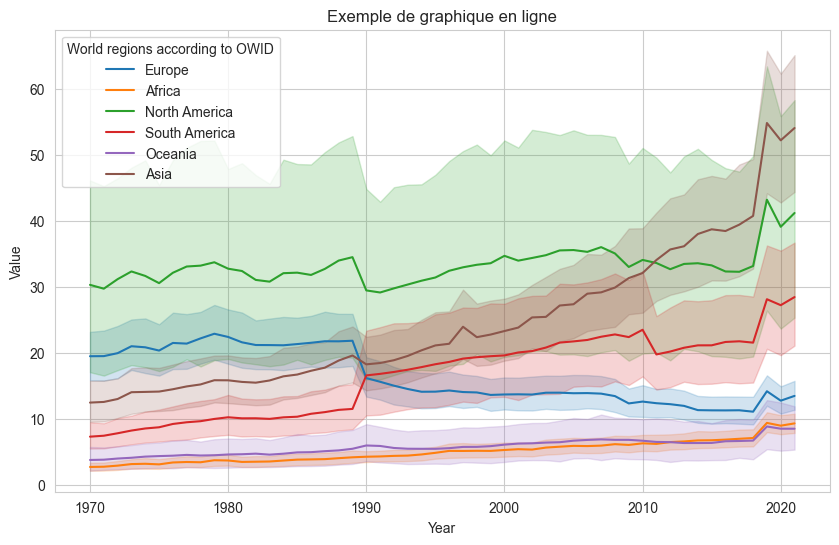

In [6]:
# Tracer un graphique en ligne simple
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merged, x='Year_x', y='Value', hue='World regions according to OWID')
plt.title('Exemple de graphique en ligne')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

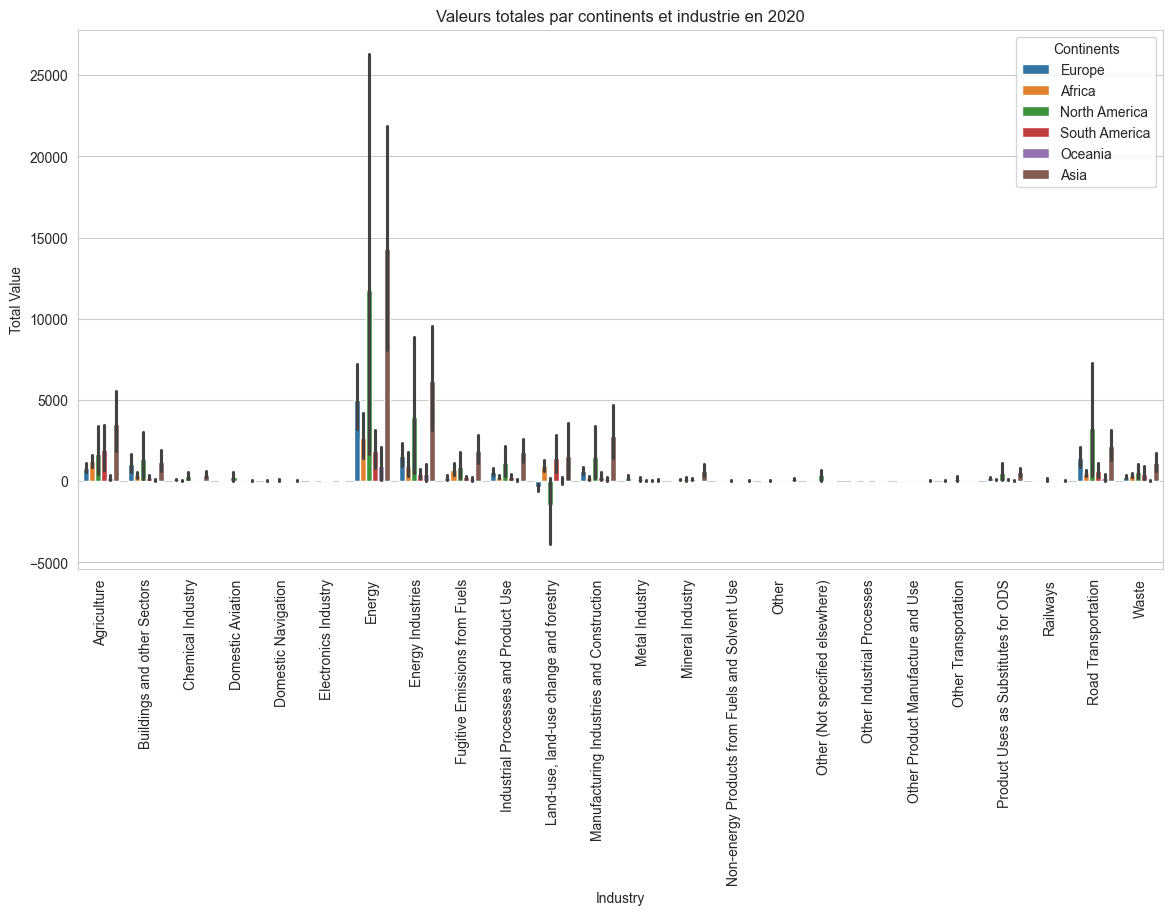

In [16]:
# Filtrer les données pour exclure les valeurs "Not applicable" dans la colonne 'Industry'
filtered_df = df_merged[(df_merged['Year_x'] == 2020) & (df_merged['Industry'] != 'Not Applicable')]

plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_df[filtered_df['Year_x'] == 2020], x='Industry', y='Value', hue='World regions according to OWID', estimator=sum)
plt.title('Valeurs totales par continents et industrie en 2020')
plt.xlabel('Industry')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.legend(title='Continents') 
plt.show()

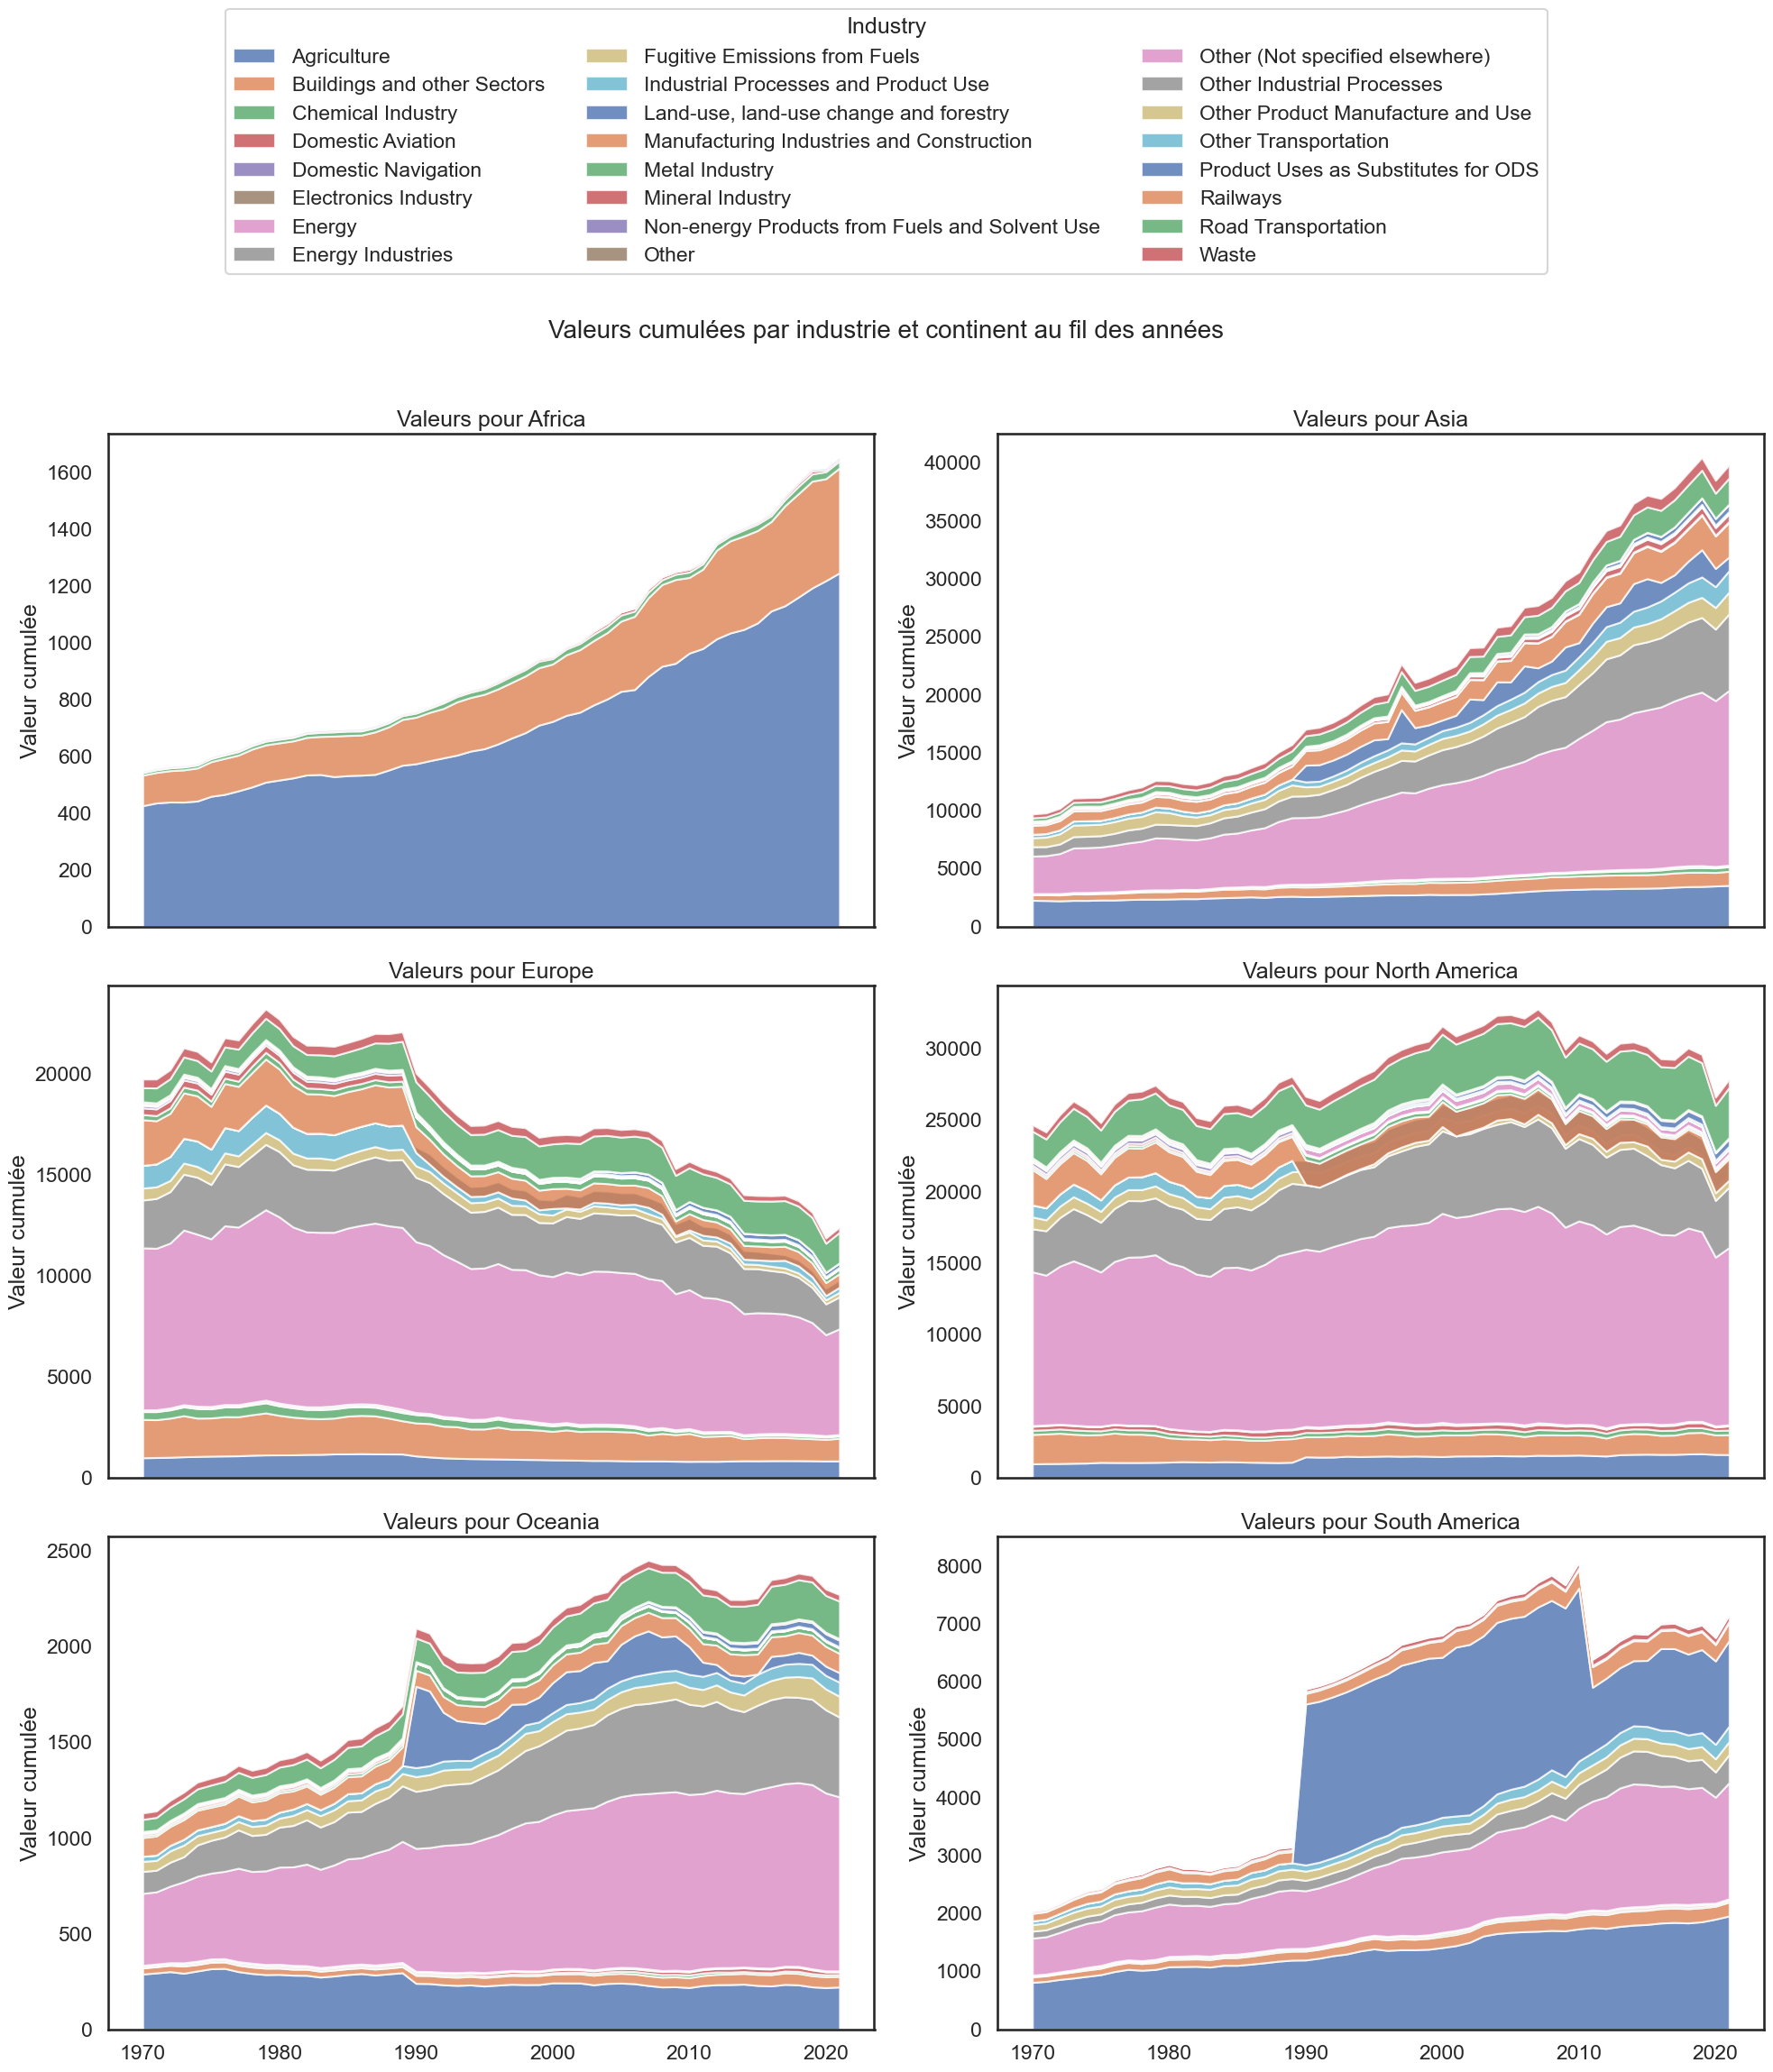

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer les données pour exclure les valeurs "Not applicable" dans la colonne 'Industry'
filtered_df = df_merged[df_merged['Industry'] != 'Not Applicable']

# Calculer les valeurs cumulées par année, continent et industrie
cumulative_df = filtered_df.groupby(['Year_x', 'World regions according to OWID', 'Industry'])['Value'].sum().unstack(level=2)

# Liste des continents
continents = cumulative_df.index.levels[1]

# Créer une figure avec une grille de sous-graphiques
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharex=True)
fig.suptitle('Valeurs cumulées par industrie et continent au fil des années', fontsize=20)

# Aplatir la grille pour faciliter l'itération
axes = axes.flatten()

# Tracer un graphique pour chaque continent
for i, continent in enumerate(continents):
    if continent in cumulative_df.index.get_level_values(1):
        data_to_plot = cumulative_df.loc[(slice(None), continent), :]
        axes[i].stackplot(data_to_plot.index.get_level_values(0), data_to_plot.T, labels=data_to_plot.columns, alpha=0.8)
        axes[i].set_title(f'Valeurs pour {continent}')
        axes[i].set_ylabel('Valeur cumulée')
        #axes[i].legend(title='Industry', loc='upper left')

# Ajouter une légende globale en bas de la figure
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, title='Industry', bbox_to_anchor=(0.5, 1))

# Ajuster la disposition
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


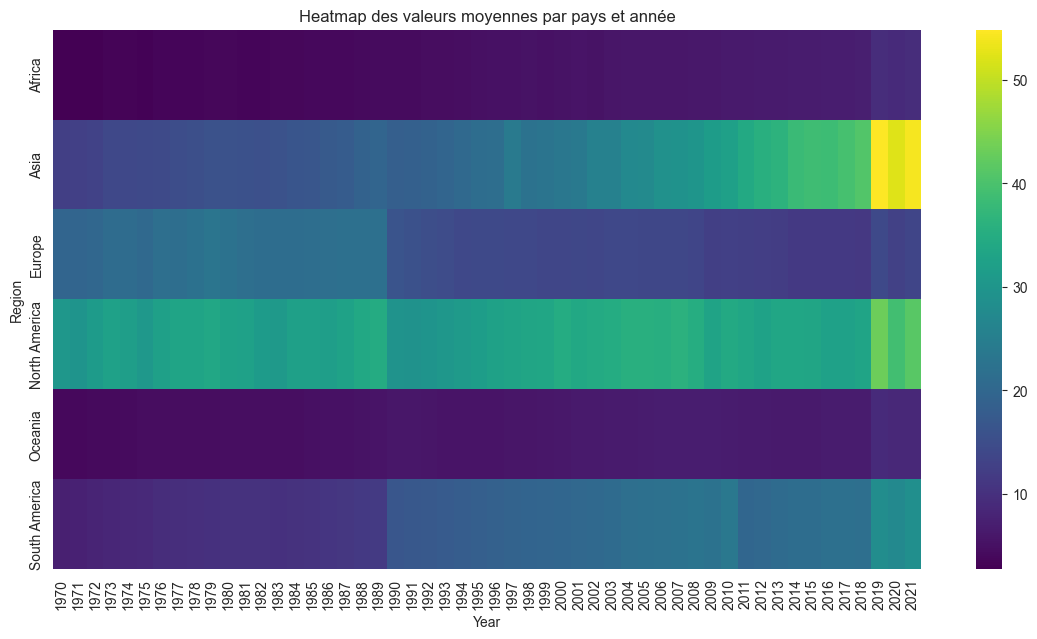

In [8]:
# Préparer les données pour la heatmap
pivot_table = df_merged.pivot_table(values='Value', index='World regions according to OWID', columns='Year_x', aggfunc='mean')

plt.figure(figsize=(14, 7))
sns.heatmap(data=pivot_table, cmap='viridis')
plt.title('Heatmap des valeurs moyennes par pays et année')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()
